### 不完全情報ゲームの例: ジジ抜き
- ジジ抜きとはババ抜きに類似したゲームであり，違う部分は
  ペアにならないカード（ジジ）が事前に各プレイヤーに知らされないことにある。
    - 簡略化のため，プレイヤー1がカードを2枚，プレイヤー2がカードを1枚持っている状態からゲームを始めるものとする。
    - このとき，ジジにするカードは，ゲームの開始前にランダムに決定される。
      - この分布の確率質量関数を $P(a_0)$ で表す。
    - プレイヤー1のカード2枚のうち，どれか1枚がジジであり，ペアにはなっていない。
    - プレイヤー1は，どのカードがジジなのかわかってない。
    - 一方，プレイヤー1のカードがペアにならないことから，プレイヤー2は自身の
       カードがジジでないことがわかっている。
    - プレイヤー1 の行動は P ${}_0$ ，または P ${}_1$ のいずれかのパターンでカードを並べて持つこと
    - プレイヤー2 の行動は L (左のカードをとる)，または R (右のカードをとる)
    - プレイヤー $i$ の混合戦略に対応する確率分布を $s_i(a_i)$ で表す。
- 以下では，$P(a_0)$, $s_1(a_1)$, $s_2(a_2)$ の確率分布の標本からジジ抜きにおけるプレイヤー1の期待効用の推定値を計算する
    - プレイヤー1 の期待効用の定義
      $$
        E[u_1(a_0, a_1, a_2)] = \sum_{a_0 \in A_0} \sum_{a_1 \in A_1} \sum_{a_2 \in A_2} u_1(a_0, a_1, a_2) P(a_0) s_1(a_1) s_2(a_2)
      $$
    - K 個の標本値 $(a_{0,k})_{k=1}^{K}$, $(a_{1,k})_{k=1}^{K}$, $(a_{2,k})_{k=1}^{K}$ について，
      $u_1(a_{0,k}, a_{1, k}, a_{2, k})$ の算術平均の期待値，分散は次のとおり。
      $$
        E\left[ \dfrac{1}{K} \sum_{k=1}^K u_1(a_{0,k}, a_{1, k}, a_{2, k})\right] = E[u(a_0, a_1, a_2)]
      $$
      $$
        V\left[ \dfrac{1}{K} \sum_{k=1}^K u_1(a_{0,k}, a_{1, k}, a_{2, k})\right] = \dfrac{1}{K} V[u(a_0, a_1, a_2)]
      $$
    - したがって，$u_1(a_{0,k}, a_{1, k}, a_{2, k})$ の算術平均は期待効用 $E[u(a_0, a_1, a_2)]$ の推定値となる。(大数の法則)
    - ただし，前提として，
      - $a_0$，$a_1$，$a_2$ は独立であり
      - それぞれの標本値 $(a_{i,k})_{k=1}^{K}$ は，独立かつ同一分布に従う。すなわち，i. i. d. (independent and identically distributed) である。 


In [2]:
import itertools 
import numpy as np
import scipy.stats

cards = ('L', 'R')
patterns = ('P0', 'P1')
dict_u_1 = {('L', 'P0', 'L'): 1, # utility of player 1, given outcome (a0, a1, a2)
            ('L', 'P0', 'R'): 0,
            ('L', 'P1', 'L'): 0,
            ('L', 'P1', 'R'): 1,
            ('R', 'P0', 'L'): 0,
            ('R', 'P0', 'R'): 1,
            ('R', 'P1', 'L'): 1,
            ('R', 'P1', 'R'): 0}
num_repeat = 10000
pure_strategy = False # True
p0 = 0.6    # probability for R to be Jiji
idx_jiji = scipy.stats.bernoulli.rvs(p0, size=num_repeat)
a0 = (cards[i] for i in idx_jiji) # chance move

if pure_strategy:
    a1 = itertools.repeat('P0', num_repeat) # pure strategy
    a2 = itertools.repeat('L', num_repeat) # pure strategy
else:
    s1_P1 = 0.5 # = s_1(a_1 = P_1)
    s2_R  = 0.5 # = s_2(a_2 = R)
    idx_patt = scipy.stats.bernoulli.rvs(s1_P1, size=num_repeat)
    idx_draw = scipy.stats.bernoulli.rvs(s2_R, size=num_repeat)
    a1 = (patterns[i] for i in idx_patt) # mixed strategy
    a2 = (cards[i] for i in idx_draw) # mixed strategy

u = [dict_u_1[c] for c in zip(a0, a1, a2)]
print('Sample expected utility (of player 1):', np.mean(u))

Sample expected utility (of player 1): 0.5032


大数の法則の確認
- モデル（母集団 = population の確率分布）に基づく期待効用と標本から求めた期待効用の推定値(sample)を比較する
- 以下のセルを正常に実行するには Notebook の最初から順にセルを実行しておく必要がある。

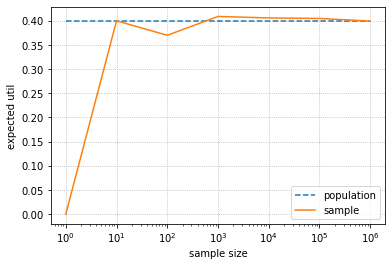

In [4]:
import matplotlib.pyplot as plt
from math import fsum

# 純粋/混合戦略の切替
pure_strategy = True #False

# 偶然手番の確率分布
s0 = {'L': 0.4,
      'R': 0.6}

# プレイヤー1 の混合戦略の確率分布
s1 = {'P0': 0.5, 
      'P1': 0.5}

# プレイヤー2 の混合戦略の確率分布
s2 = {'L': 0.5,
      'R': 0.5}

pure_st_a1 = 'P0'
pure_st_a2 = 'L'

smp_exp_util1_data = []
arr_smp_sz = 10**np.arange(7) # 標本のサイズの配列

for sz in arr_smp_sz:
    idx_jiji = scipy.stats.bernoulli.rvs(s0['R'], size=sz)
    a0 = (cards[i] for i in idx_jiji) # chance move

    if pure_strategy:
        a1 = itertools.repeat(pure_st_a1, sz) # pure strategy
        a2 = itertools.repeat(pure_st_a2, sz) # pure strategy
    else:
        idx_patt = scipy.stats.bernoulli.rvs(s1['P1'], size=sz)
        idx_draw = scipy.stats.bernoulli.rvs(s2['R'], size=sz)
        a1 = (patterns[i] for i in idx_patt) # mixed strategy
        a2 = (cards[i] for i in idx_draw) # mixed strategy

    u1_sample = [dict_u_1[c] for c in zip(a0, a1, a2)]
    smp_exp_util1_data.append(np.mean(u1_sample))

if pure_strategy:
    pop_exp_util1 = fsum(dict_u_1[(a0, pure_st_a1, pure_st_a2)]*s0[a0]
                        for a0 in s0.keys())

else:
    pop_exp_util1 = fsum(dict_u_1[(a0, a1, a2)]*s0[a0]*s1[a1]*s2[a2] 
                        for a0 in s0.keys()
                        for a1 in s1.keys()
                        for a2 in s2.keys())
                        
plt.plot(arr_smp_sz, np.full_like(smp_exp_util1_data, pop_exp_util1), linestyle='dashed')
plt.plot(arr_smp_sz, smp_exp_util1_data) 
plt.legend(('population', 'sample'))

plt.xlabel('sample size')
plt.ylabel('expected util')
ax = plt.gca()
ax.set_xscale('log')
plt.grid(linestyle=':')
plt.show()

#### 解説
- 以下の解説のセルを正常に実行するには Notebook の最初から順にセルを実行しておく必要がある。

[`itertools.repeat(v, n)`](https://docs.python.org/ja/3/library/itertools.html#itertools.repeat) は v を n 回だけ出力するイテレータを作る

In [ ]:
import itertools
print(tuple(itertools.repeat('Bow-wow', 3)))

('Bow-wow', 'Bow-wow', 'Bow-wow')


[`scipy.stats.bernoulli.rvs(q, size=n)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html) は ベルヌーイ分布 $P(X| q) = q^X (1 - q)^{1-X}$ 
に従う確率変数 $X$ の標本値 n 個からなる配列を生成する。ただし， $X \in \{0, 1\}$ 。

array([1, 1, 1, 1, 0])
<generator object <genexpr> at 0x0000027F2DF6D120>
('裏', '裏', '裏', '裏', '表')


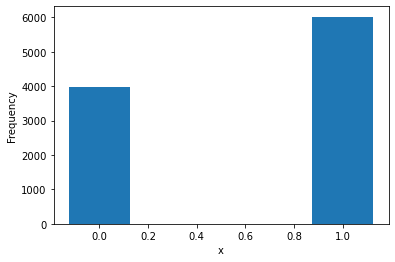

In [5]:
from scipy.stats import bernoulli

outcomes = ('表', '裏') # コイントスの結果
q = 0.6 # 歪んだコインを想定する  
rnd_idx = bernoulli.rvs(q, size=5) # パラメータが q のベルヌーイ分布に従う標本値の生成
print(repr(rnd_idx))
gen = (outcomes[i] for i in rnd_idx)
print(repr(gen))
print(tuple(gen))

x = bernoulli.rvs(q, size=10000)
ret = plt.hist(x, bins=np.arange(len(outcomes) + 1), align='left', rwidth=0.25)
plt.ylabel('Frequency')
retval = plt.xlabel('x')

[`zip()`](https://docs.python.org/ja/3.9/library/functions.html#zip) は，異なる複数のシーケンスの要素を一斉に取り出して tuple にまとめるイテレータを作る

In [6]:
t0 = ('ant', 'bee', 'cat')
t1 = (0, 1, 2)
t2 = (0xfeed, 0xcafe, 0xbeef)
print([f'{x}, {y}, 0x{z:x}' for x, y, z in zip(t0, t1, t2)])

# 等価な他の表現
print([f'{x}, {y}, 0x{z:x}' for (x, y, z) in zip(t0, t1, t2)])
print([f'{c[0]}, {c[1]}, 0x{c[2]:x}' for c in zip(t0, t1, t2)])

['ant, 0, 0xfeed', 'bee, 1, 0xcafe', 'cat, 2, 0xbeef']
['ant, 0, 0xfeed', 'bee, 1, 0xcafe', 'cat, 2, 0xbeef']
['ant, 0, 0xfeed', 'bee, 1, 0xcafe', 'cat, 2, 0xbeef']


[`numpy.full_like(x, val)`](https://numpy.org/doc/stable/reference/generated/numpy.full_like.html) 
は `x` と同じ shape で，全ての要素が `val` となった配列を作る

In [7]:
x = np.arange(5)
y = np.full_like(x, 99)
print('x ==', repr(x))
print('x.shape ==', repr(x.shape))
print('y ==', repr(y))
print('y.shape ==', repr(y.shape))

x == array([0, 1, 2, 3, 4])
x.shape == (5,)
y == array([99, 99, 99, 99, 99])
y.shape == (5,)



[`math.fsum()`](https://docs.python.org/ja/3.9/library/math.html#math.fsum) の引数に
[ジェネレータ式](https://docs.python.org/ja/3.8/howto/functional.html#generator-expressions-and-list-comprehensions)
を指定すれば総和の式 $\displaystyle \sum_{a \in A} f(a)$ を表現できる。

In [ ]:
from IPython.display import display_markdown
from math import fsum

def f(x):
    return 2*x

A = set(range(5))

display_markdown(r' $A = $ ' + f' {A} ', raw=True)

display_markdown(r' $\displaystyle \sum_{a \in A} a = $ ' + 
                f'{ fsum(a for a in A) }', raw=True)

display_markdown(r' $\displaystyle \sum_{a \in A} f(a) = $ ' + 
                f'{ fsum(f(a) for a in A) }', raw=True)

 $A = $  {0, 1, 2, 3, 4} 

 $\displaystyle \sum_{a \in A} a = $ 10.0

 $\displaystyle \sum_{a \in A} f(a) = $ 20.0